Intersecting y=2 and x=1


Intersection is (homogeneous) [-1 -2 -1]
Intersection is (real) [1. 2.]


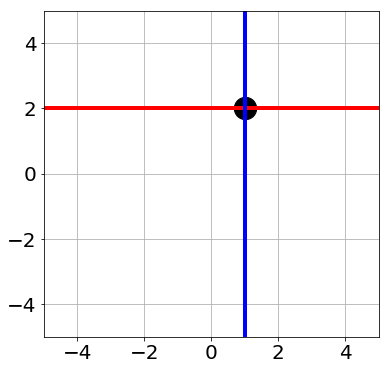





Intersecting y=2 and line between (0,0) and (1,1)


line(y=2)^T p =   0.0 (should be 0)
p is on line(y=2): True (should be True)
p^T line(x=1) =  -1.0 (should not be 0)
p is on line(x=1): False (should be False)


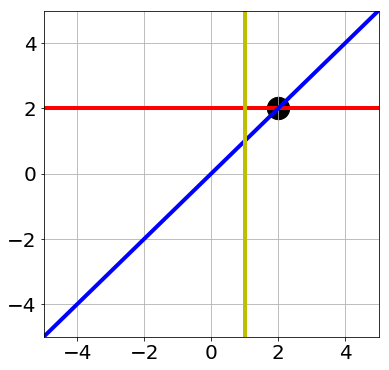





Intersecting y={1,2,3} and seeing it it intersects y=x


Intersection of y=1 and y=2 -> [-1  0  0]
dot(cross(line(y=1),line(y=2)),line(y=3)) = 0
    y=1 , y=2 , y=3  intersect: True
dot(cross(line(y=1),line(y=3)),line(y=x)) = 1
    y=1 , y=2 , y=x  intersect: False


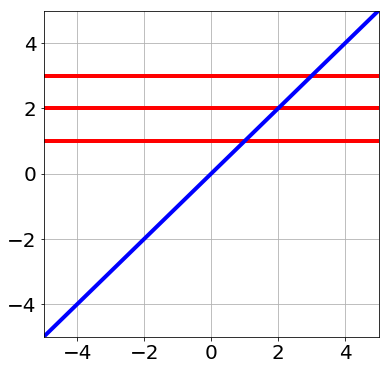

In [0]:
#David Fouhey
#Homogeneous coordinates examples
#UMich EECS 442 Fall 2019

import matplotlib.pyplot as plt
import numpy as np

#Everything is too small otherwise
#https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
SMALL_SIZE = 20; MEDIUM_SIZE = 30; BIGGER_SIZE = 40
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

###Helper stuff
def draw_line(abc,color='k',ylim=(-5,5),xlim=(-5,5)):
  #draw a line in the form abc (i.e., line satisfying ax+by+c = 0)
  a,b,c = abc[0], abc[1], abc[2]
  #https://stackoverflow.com/questions/14000595/graphing-an-equation-with-matplotlib
  #http://courses.csail.mit.edu/6.867/wiki/images/3/3f/Plot-python.pdf
  xlist = np.linspace(ylim[0], ylim[1], 500) # Create 1-D arrays for x,y dimensions
  ylist = np.linspace(ylim[0], ylim[1], 150) 
  X,Y = np.meshgrid(xlist, ylist) # Create 2-D grid xlist,ylist values
  F = a*X + b*Y + c
  plt.contour(X, Y, F, [0], colors = color, linestyles = 'solid', linewidths=[4])
  
def draw_point(xy,color='k'):
  #draw a point at xy
  plt.scatter(xy[0],xy[1],500,color=color)

def ymxb2abc(mb):
  #convert y=mx+b (the world's worst parameterization) to ax+by+c = 0
  m,b = mb
  return np.array([m,-1,b])

def homogeneous2real(uvw):
  #convert homogeneous coordinate to real
  return uvw[:2] / uvw[2]

def real2homogeneous(xy):
  #convert real to homogeneous
  return np.hstack([xy,np.ones((1,))])

def newfig():
  plt.figure(figsize=(6,6)) 
  plt.grid(True,which='both')

def showfig():
  plt.show()
  
  
def pointOnLine(line,point):
  return np.dot(line,point)**2 < 1e-6
#####


#####
if __name__ == "__main__":
  
  
  #First intersect y=2 and x=1
  print("Intersecting y=2 and x=1\n\n")
  newfig()
  lyeq2 = np.array([0,-1,2]) #y = 2
  lxeq1 = np.array([1,0,-1]) #x = 1
  px1y2 = np.cross(lxeq1,lyeq2)
  
  print("Intersection is (homogeneous) %s" % px1y2)
  px1y2_real = homogeneous2real(px1y2)
  print("Intersection is (real) %s" % px1y2_real)
 

  draw_line(lyeq2,color='r')
  draw_line(lxeq1,color='b')
  draw_point(px1y2_real,color='k')
  showfig()

  

  #####
  #Next, construct the line between [0,0] and [1,1]  (line y=x)
  #and find the intersection of that and y=2 (line y=2)
  print("\n\n\n\nIntersecting y=2 and line between (0,0) and (1,1)\n\n")
  newfig()
  pZeroZero = real2homogeneous(np.array([0,0]))
  pOneOne = real2homogeneous(np.array([1,1]))
  lyeqx = np.cross(pZeroZero,pOneOne)

  draw_line(lyeq2,color='r')
  draw_line(lyeqx,color='b')
  draw_line(lxeq1,color='y')
  isect = np.cross(lyeq2,lyeqx)
  isect_real = homogeneous2real(isect)
  draw_point(isect_real,color='k')
  ######
  #Next, check if isect(line(y=2),line(y=x)) lies on line(y=2) and on line(x=1)
  print("line(y=2)^T p = %5.1f (should be 0)" % (np.dot(lyeq2,isect)))
  print("p is on line(y=2): %s (should be True)" % (pointOnLine(lyeq2,isect)))
  print("p^T line(x=1) = %5.1f (should not be 0)" % (np.dot(lxeq1,isect)))
  print("p is on line(x=1): %s (should be False)" % (pointOnLine(lxeq1,isect)))
  showfig()

  

  #####
  #compute intersection of parallel lines (y=1, y=2, y=3) and see if 
  print("\n\n\n\nIntersecting y={1,2,3} and seeing it it intersects y=x\n\n")
  lyeq1 = np.array([0,1,-1])
  lyeq2 = np.array([0,1,-2])
  lyeq3 = np.array([0,1,-3])
  lyeqx = np.array([-1,1,0])

  newfig()
  draw_line(lyeq1,color='r')
  draw_line(lyeq2,color='r')
  draw_line(lyeq3,color='r')
  draw_line(lyeqx,color='b')

  isecty1 = np.cross(lyeq1,lyeq2)

  print("Intersection of y=1 and y=2 -> %s" % isecty1)
  print("dot(cross(line(y=1),line(y=2)),line(y=3)) = %d" % np.dot(isecty1,lyeq3))
  print("    y=1 , y=2 , y=3  intersect: %s" % pointOnLine(isecty1,lyeq3))
  print("dot(cross(line(y=1),line(y=3)),line(y=x)) = %d" % np.dot(isecty1,lyeqx))
  print("    y=1 , y=2 , y=x  intersect: %s" % pointOnLine(isecty1,lyeqx))

  showfig()
